в условиях VI.9.29 решить задачу экстраполяции населения страны методами: 

1. Классическая полиномиальная интерполяция по Ньютону
2. Сплайн-интерполяция
3. Метод наименьших квадратов
4. (может быть добавлю ещё что-нибудь)

На свое усмотрение можете актуализировать данные , например, искать значение в 2024 году , а данные за 2020 и по референсному году для сравнения найти в открытых источниках. Можно страну взять любую (почти, без глобальных потрясений).

Согласно переписи население США менялось следующим образом:

1910 – 92 228 496 человек,

1920 – 106 021 537,

1930 – 123 202 624,

1940 – 132 164 569,

1950 – 151 325 798,

1960 – 179 323 175,

1970 – 203 211 926,

1980 – 226 545 805,

1990 – 248 709 873,

2000 – 281 421 906.


Спрогнозировать:

1965 год - 190 000 000 человек.

1935 год - 127 362 000 человек.

1995 год - 266 278 000 человек.

2010 год - 308 745 538 человек.

2020 год – 331 449 281 человек.

2024 год – 342 653 597 человек.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

years = np.array([1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000])
population = np.array([
    92_228_496,
    106_021_537,
    123_202_624,
    132_164_569,
    151_325_798,
    179_323_175,
    203_211_926,
    226_545_805,
    248_709_873,
    281_421_906
])

real_1965 = 190_000_000
real_1935 = 127_362_000
real_1995 = 266_278_000
real_2010 = 308_745_538
real_2020 = 331_449_281
real_2024 = 342_653_597


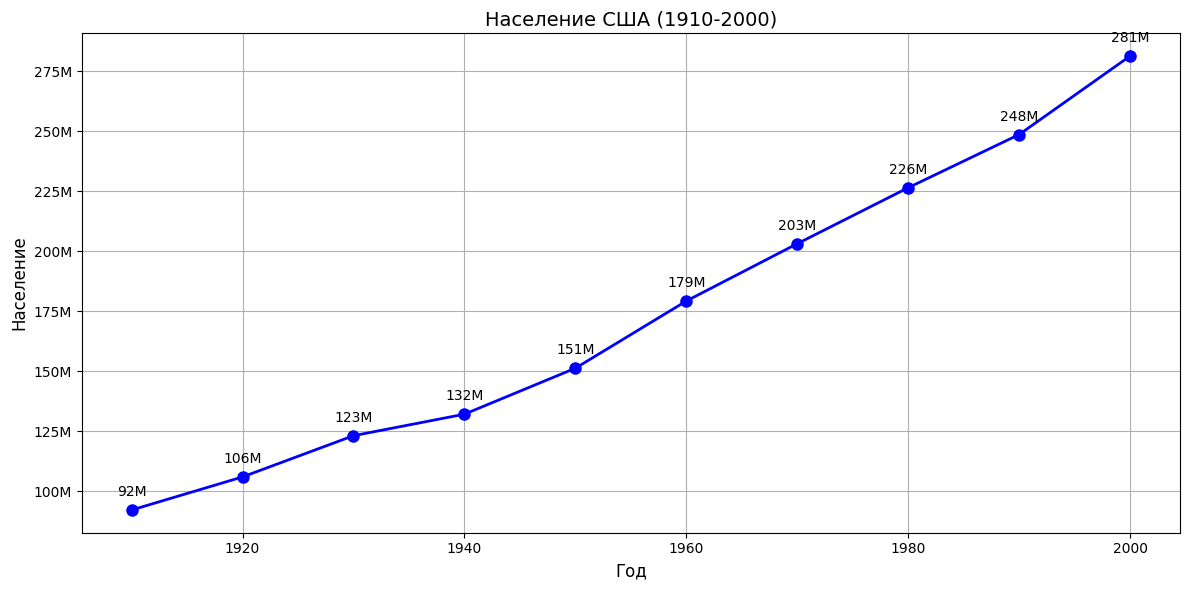

In [2]:
plt.figure(figsize=(12, 6))
plt.plot(years, population, 'bo-', linewidth=2, markersize=8)
plt.grid(True)
plt.title('Население США (1910-2000)', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Население', fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1e6)}M'))

for i, (year, pop) in enumerate(zip(years, population)):
    plt.annotate(f'{int(pop/1e6)}M', 
                (year, pop),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

plt.tight_layout()
plt.show()

Прогноз на 1965: 191,995,673 (Реальное значение: 190000000, Относительная ошибка: 1.05%)
Прогноз на 1935: 127,500,746 (Реальное значение: 127362000, Относительная ошибка: 0.11%)
Прогноз на 1995: 255,893,307 (Реальное значение: 266278000, Относительная ошибка: 3.90%)
Прогноз на 2010: 827,906,509 (Реальное значение: 308745538, Относительная ошибка: 168.15%)
Прогноз на 2020: 4,774,878,490 (Реальное значение: 331449281, Относительная ошибка: 1,340.61%)
Прогноз на 2024: 9,156,226,282 (Реальное значение: 342653597, Относительная ошибка: 2,572.15%)


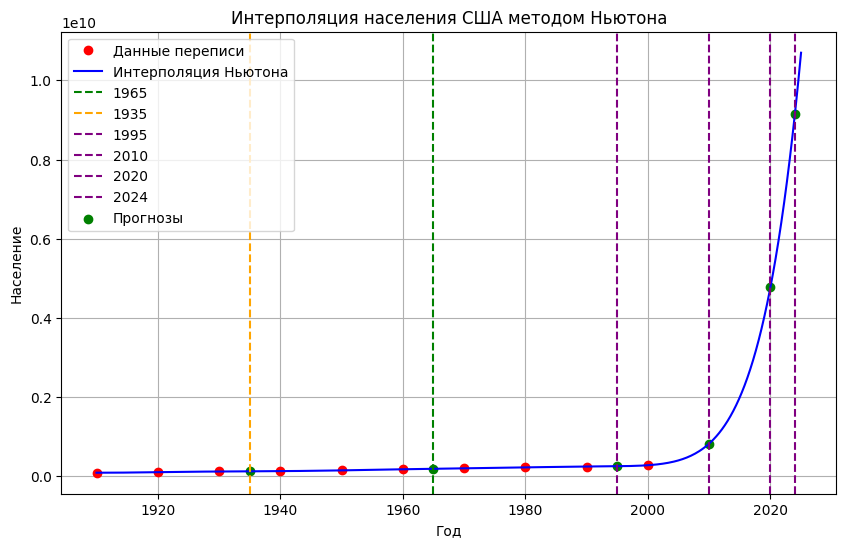

In [3]:
#  y[0]
#        f[0,1]
#  y[1]           f[0,2]
#        f[1,1]            f[0,3]
#  y[2]           f[1,2]
#        f[2,1]
#  y[3]

def divided_differences(x, f):
    n = len(x)
    coef = np.zeros([n, n])
    coef[:, 0] = f  

    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i + 1, j - 1] - coef[i, j - 1]) / (x[i + j] - x[i])
    
    return coef[0, :]  

def newton_polynomial(x, x_points, coef):
    n = len(x_points)
    result = coef[0]
    for i in range(1, n):
        term = coef[i]
        for j in range(i):
            term *= (x - x_points[j])
        result += term
    return result

coefficients = divided_differences(years, population)

pred_1965 = newton_polynomial(1965, years, coefficients)
pred_1935 = newton_polynomial(1935, years, coefficients)
pred_1995 = newton_polynomial(1995, years, coefficients)
pred_2010 = newton_polynomial(2010, years, coefficients)
pred_2020 = newton_polynomial(2020, years, coefficients)
pred_2024 = newton_polynomial(2024, years, coefficients)

print(f"Прогноз на 1965: {pred_1965:,.0f} (Реальное значение: {real_1965}, Относительная ошибка: {abs(pred_1965 - real_1965)/real_1965*100:,.2f}%)")
print(f"Прогноз на 1935: {pred_1935:,.0f} (Реальное значение: {real_1935}, Относительная ошибка: {abs(pred_1935 - real_1935)/real_1935*100:,.2f}%)")
print(f"Прогноз на 1995: {pred_1995:,.0f} (Реальное значение: {real_1995}, Относительная ошибка: {abs(pred_1995 - real_1995)/real_1995*100:,.2f}%)")
print(f"Прогноз на 2010: {pred_2010:,.0f} (Реальное значение: {real_2010}, Относительная ошибка: {abs(pred_2010 - real_2010)/real_2010*100:,.2f}%)")
print(f"Прогноз на 2020: {pred_2020:,.0f} (Реальное значение: {real_2020}, Относительная ошибка: {abs(pred_2020 - real_2020)/real_2020*100:,.2f}%)")
print(f"Прогноз на 2024: {pred_2024:,.0f} (Реальное значение: {real_2024}, Относительная ошибка: {abs(pred_2024 - real_2024)/real_2024*100:,.2f}%)")

# График
x_plot = np.linspace(1910, 2025, 500)
y_plot = newton_polynomial(x_plot, years, coefficients)

plt.figure(figsize=(10, 6))
plt.plot(years, population, 'o', label='Данные переписи', color='red')
plt.plot(x_plot, y_plot, label='Интерполяция Ньютона', color='blue')
plt.axvline(1965, color='green', linestyle='--', label='1965')
plt.axvline(1935, color='orange', linestyle='--', label='1935')
plt.axvline(1995, color='purple', linestyle='--', label='1995')
plt.axvline(2010, color='purple', linestyle='--', label='2010')
plt.axvline(2020, color='purple', linestyle='--', label='2020')
plt.axvline(2024, color='purple', linestyle='--', label='2024')
plt.scatter([1965, 1935, 1995, 2010, 2020, 2024], [pred_1965, pred_1935, pred_1995, pred_2010, pred_2020, pred_2024], color='green', label='Прогнозы')
plt.xlabel('Год')
plt.ylabel('Население')
plt.title('Интерполяция населения США методом Ньютона')
plt.legend()
plt.grid()
plt.show()


# 2. Сплайн-интерполяция

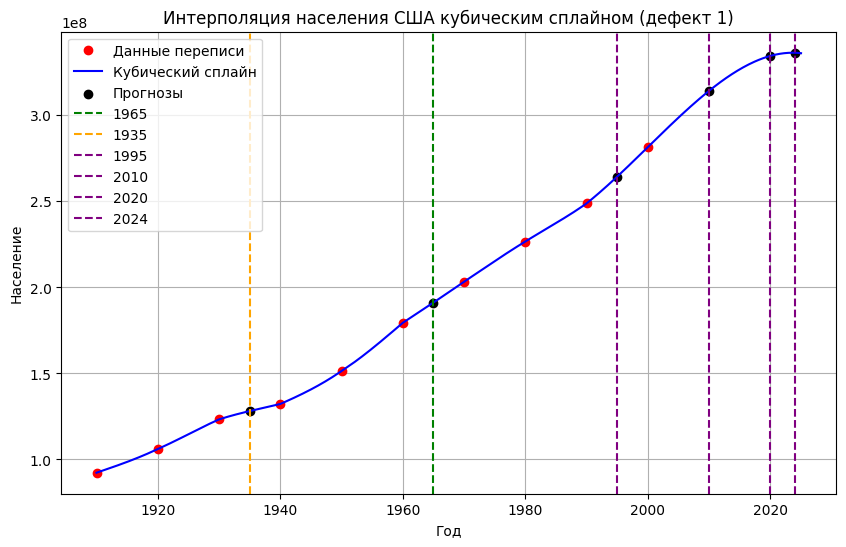

Прогноз на 1965: 191,108,270 (Реальное значение: 190,000,000, Относительная ошибка: 0.58%)
Прогноз на 1935: 128,049,869 (Реальное значение: 127,362,000, Относительная ошибка: 0.54%)
Прогноз на 1995: 264,286,982 (Реальное значение: 266,278,000, Относительная ошибка: 0.75%)
Прогноз на 2010: 314,133,939 (Реальное значение: 308,745,538, Относительная ошибка: 1.75%)
Прогноз на 2020: 334,383,452 (Реальное значение: 331,449,281, Относительная ошибка: 0.89%)
Прогноз на 2024: 336,202,148 (Реальное значение: 342,653,597, Относительная ошибка: 1.88%)


In [6]:
def cubic_spline_coefficients(x, y):
    n = len(x) - 1
    h = np.diff(x) 
    b = np.diff(y) / h  

    A = np.zeros((n + 1, n + 1))
    rhs = np.zeros(n + 1)

    for i in range(1, n):
        A[i, i - 1] = -h[i - 1]
        A[i, i] = (h[i - 1] + h[i])
        A[i, i + 1] =  h[i]
        rhs[i] = 3 * (b[i] - b[i - 1])

    A[0, 0] = 0
    A[n, n] = 0

    # Метод бисопряженных градиентов
    n = len(rhs)
    x = np.zeros(n)  
    r = rhs - A @ x  
    r_tilde = r.copy()  
    p = r.copy()
    p_tilde = r_tilde.copy()
    
    eps = 1e-10  
    max_iter = 1000  
    
    for i in range(max_iter):
        alpha = np.dot(r, r_tilde) / np.dot(A @ p, p_tilde)
        x = x + alpha * p
        r_next = r - alpha * (A @ p)
        r_tilde_next = r_tilde - alpha * (A.T @ p_tilde)
        
        beta = np.dot(r_next, r_tilde_next) / np.dot(r, r_tilde)
        p = r_next + beta * p
        p_tilde = r_tilde_next + beta * p_tilde
        
        if np.linalg.norm(r_next) < eps:
            break
            
        r = r_next
        r_tilde = r_tilde_next
    
    m = x

    return m, h

def cubic_spline_interpolate(x, y, m, h, x_new):
    n = len(x) - 1
    result = np.zeros_like(x_new)

    for k, xk in enumerate(x_new):
        if xk < x[0]:  # Экстраполяция влево
            # Используем первый сплайн
            i = 0
            xi, xi1 = x[i], x[i + 1]
            hi = h[i]
            yi, yi1 = y[i], y[i + 1]
            mi, mi1 = m[i], m[i + 1]
        elif xk > x[-1]:  # Экстраполяция вправо
            # Используем последний сплайн
            i = n - 1
            xi, xi1 = x[i], x[i + 1]
            hi = h[i]
            yi, yi1 = y[i], y[i + 1]
            mi, mi1 = m[i], m[i + 1]
        else:  # Интерполяция
            for i in range(n):
                if x[i] <= xk <= x[i + 1]:
                    xi, xi1 = x[i], x[i + 1]
                    hi = h[i]
                    yi, yi1 = y[i], y[i + 1]
                    mi, mi1 = m[i], m[i + 1]
                    break

        result[k] = (
            mi * (xi1 - xk)**3 / (6 * hi) +
            mi1 * (xk - xi)**3 / (6 * hi) +
            (yi / hi - mi * hi / 6) * (xi1 - xk) +
            (yi1 / hi - mi1 * hi / 6) * (xk - xi)
        )

    return result

m, h = cubic_spline_coefficients(years, population)

x_new = np.array([1965, 1935, 1995, 2010, 2020, 2024])
predictions = cubic_spline_interpolate(years, population, m, h, x_new)

x_plot = np.linspace(1910, 2025, 500)
y_plot = cubic_spline_interpolate(years, population, m, h, x_plot)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(years, population, 'o', label='Данные переписи', color='red')
plt.plot(x_plot, y_plot, label='Кубический сплайн', color='blue')
plt.scatter(x_new, predictions, color='black', label='Прогнозы')
plt.axvline(1965, color='green', linestyle='--', label='1965')
plt.axvline(1935, color='orange', linestyle='--', label='1935')
plt.axvline(1995, color='purple', linestyle='--', label='1995')
plt.axvline(2010, color='purple', linestyle='--', label='2010')
plt.axvline(2020, color='purple', linestyle='--', label='2020')
plt.axvline(2024, color='purple', linestyle='--', label='2024')
plt.xlabel('Год')
plt.ylabel('Население')
plt.title('Интерполяция населения США кубическим сплайном (дефект 1)')
plt.legend()
plt.grid()
plt.show()

print(f"Прогноз на 1965: {predictions[0]:,.0f} (Реальное значение: {real_1965:,.0f}, Относительная ошибка: {abs(predictions[0] - real_1965)/real_1965*100:.2f}%)")
print(f"Прогноз на 1935: {predictions[1]:,.0f} (Реальное значение: {real_1935:,.0f}, Относительная ошибка: {abs(predictions[1] - real_1935)/real_1935*100:.2f}%)")
print(f"Прогноз на 1995: {predictions[2]:,.0f} (Реальное значение: {real_1995:,.0f}, Относительная ошибка: {abs(predictions[2] - real_1995)/real_1995*100:.2f}%)")
print(f"Прогноз на 2010: {predictions[3]:,.0f} (Реальное значение: {real_2010:,.0f}, Относительная ошибка: {abs(predictions[3] - real_2010)/real_2010*100:.2f}%)")
print(f"Прогноз на 2020: {predictions[4]:,.0f} (Реальное значение: {real_2020:,.0f}, Относительная ошибка: {abs(predictions[4] - real_2020)/real_2020*100:.2f}%)")
print(f"Прогноз на 2024: {predictions[5]:,.0f} (Реальное значение: {real_2024:,.0f}, Относительная ошибка: {abs(predictions[5] - real_2024)/real_2024*100:.2f}%)")


# 3. Метод наименьших квадратов

Прогноз на 1965: 195,381,719 (Реальное значение: 190,000,000, Относительная ошибка: 2.83%)
Прогноз на 1935: 132,483,275 (Реальное значение: 127,362,000, Относительная ошибка: 4.02%)
Прогноз на 1995: 258,280,162 (Реальное значение: 266,278,000, Относительная ошибка: 3.00%)
Прогноз на 2010: 289,729,384 (Реальное значение: 308,745,538, Относительная ошибка: 6.16%)
Прогноз на 2020: 310,695,532 (Реальное значение: 331,449,281, Относительная ошибка: 6.26%)
Прогноз на 2024: 319,081,991 (Реальное значение: 342,653,597, Относительная ошибка: 6.88%)


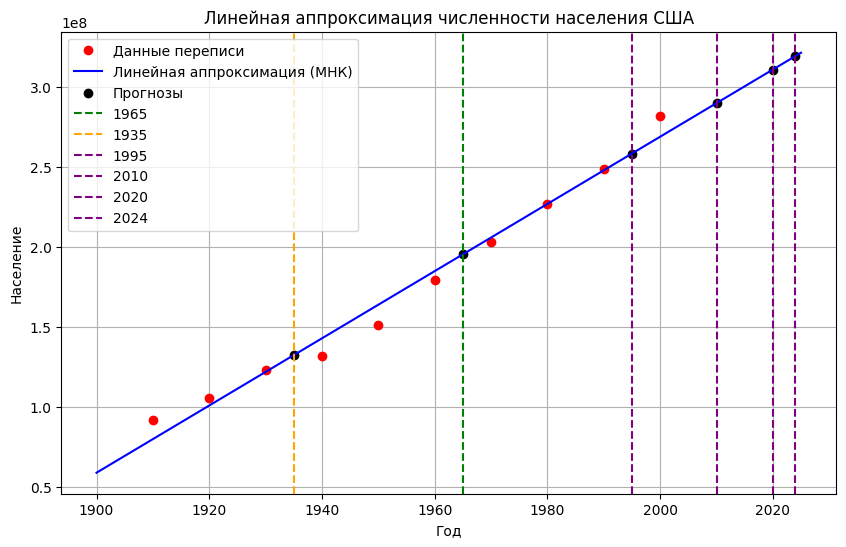

In [5]:
# Метод наименьших квадратов
def least_squares(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x ** 2)
    sum_xy = np.sum(x * y)
    
    # Вычисление коэффициентов
    a = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    b = (sum_y - a * sum_x) / n
    
    return a, b

a, b = least_squares(years, population)

pred_1965 = a * 1965 + b
pred_1935 = a * 1935 + b
pred_1995 = a * 1995 + b
pred_2010 = a * 2010 + b
pred_2020 = a * 2020 + b
pred_2024 = a * 2024 + b

print(f"Прогноз на 1965: {pred_1965:,.0f} (Реальное значение: {real_1965:,.0f}, Относительная ошибка: {abs(pred_1965 - real_1965)/real_1965*100:.2f}%)")
print(f"Прогноз на 1935: {pred_1935:,.0f} (Реальное значение: {real_1935:,.0f}, Относительная ошибка: {abs(pred_1935 - real_1935)/real_1935*100:.2f}%)")
print(f"Прогноз на 1995: {pred_1995:,.0f} (Реальное значение: {real_1995:,.0f}, Относительная ошибка: {abs(pred_1995 - real_1995)/real_1995*100:.2f}%)")
print(f"Прогноз на 2010: {pred_2010:,.0f} (Реальное значение: {real_2010:,.0f}, Относительная ошибка: {abs(pred_2010 - real_2010)/real_2010*100:.2f}%)")
print(f"Прогноз на 2020: {pred_2020:,.0f} (Реальное значение: {real_2020:,.0f}, Относительная ошибка: {abs(pred_2020 - real_2020)/real_2020*100:.2f}%)")
print(f"Прогноз на 2024: {pred_2024:,.0f} (Реальное значение: {real_2024:,.0f}, Относительная ошибка: {abs(pred_2024 - real_2024)/real_2024*100:.2f}%)")

# График аппроксимации
x_plot = np.linspace(1900, 2025, 500)
y_plot = a * x_plot + b

plt.figure(figsize=(10, 6))
plt.plot(years, population, 'o', label='Данные переписи', color='red')
plt.plot(x_plot, y_plot, label='Линейная аппроксимация (МНК)', color='blue')
plt.scatter([1965, 1935, 1995, 2010, 2020, 2024], [pred_1965, pred_1935, pred_1995, pred_2010, pred_2020, pred_2024], color='black', label='Прогнозы')
plt.axvline(1965, color='green', linestyle='--', label='1965')
plt.axvline(1935, color='orange', linestyle='--', label='1935')
plt.axvline(1995, color='purple', linestyle='--', label='1995')
plt.axvline(2010, color='purple', linestyle='--', label='2010')
plt.axvline(2020, color='purple', linestyle='--', label='2020')
plt.axvline(2024, color='purple', linestyle='--', label='2024')
plt.xlabel('Год')
plt.ylabel('Население')
plt.title('Линейная аппроксимация численности населения США')
plt.legend()
plt.grid()
plt.show()